Analyize DeepLabCut Data

In [28]:
import pandas as pd

df = pd.read_csv('/Users/nathanyeelee/Documents/GitHub/JFlab-analysis/data/joseph_data/11_2_1DLC_resnet50_MR10_11_MJJ_DLCMay8shuffle1_100000(in).csv', header=[1,2])
df.drop(columns=[col for col in df.columns if col[1]=='likelihood'], inplace=True)

print(df.head())

  bodyparts        Body               top_left              top_right  \
     coords           x           y          x           y          x   
0         0   65.504692  149.251877  44.415886  159.942322  42.618267   
1         1   96.652153  117.434410  44.758247  160.405457  42.535648   
2         2   99.095093  119.361862  44.741802  160.301209  42.443489   
3         3  102.641098  123.401695  44.686554  160.234909  42.364712   
4         4  103.868225  124.578545  44.583534  160.245880  42.223476   

              
           y  
0  95.987808  
1  96.232384  
2  96.019119  
3  96.022797  
4  96.177086  


In [66]:
def euclidean_distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

body_x = df[('Body', 'x')]
body_y = df[('Body', 'y')]
top_left_x = df[('top_left', 'x')]
top_left_y = df[('top_left', 'y')]
top_right_x = df[('top_right', 'x')]
top_right_y = df[('top_right', 'y')]

box_length_cm = 15 # Distance in cm equal to distance from top left to top right 
box_length_pixel = euclidean_distance(top_left_x, top_left_y, top_right_x, top_right_y)

cm_pixel_ratio = box_length_cm / box_length_pixel

print(box_length_pixel)

0        63.979772
1        64.211550
2        64.323163
3        64.254076
4        64.112247
           ...    
28568    64.868731
28569    64.853080
28570    64.584453
28571    64.387642
28572    64.094959
Length: 28573, dtype: float64


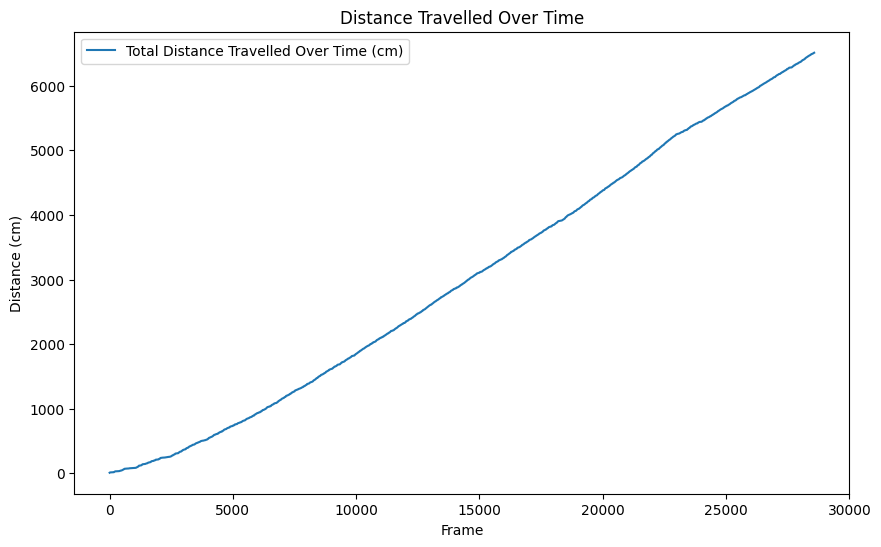

In [ ]:
import numpy as np

dist_top_left = euclidean_distance(body_x, body_y, top_left_x, top_left_y)
dist_top_left_cm = dist_top_left * cm_pixel_ratio  # Distance from top left to body in cm

distance_travelled = abs(dist_top_left_cm.diff())
total_distance_travelled = np.cumsum(distance_travelled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_distance_travelled, label='Total Distance Travelled Over Time (cm)')
plt.title('Distance Travelled Over Time')
plt.xlabel('Frame')
plt.ylabel('Distance (cm)')
plt.show()

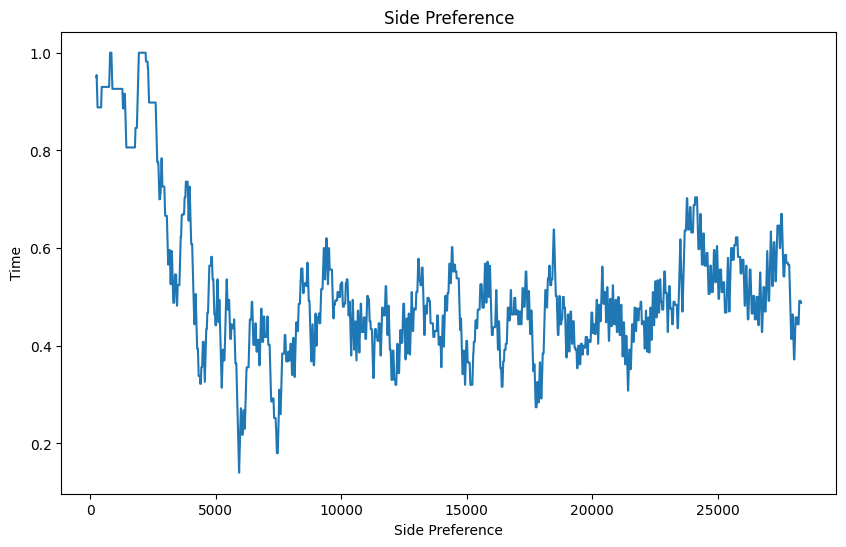

In [ ]:
dist_top_right = euclidean_distance(body_x, body_y, top_right_x, top_right_y)
dist_top_right_cm = dist_top_right * (box_length_cm / box_length_pixel)

side_preference = pd.Series(np.where(dist_top_left_cm > dist_top_right_cm, 0, 1)) # Left = 0, Right = 1
side_preference_rolling = side_preference.rolling(window=500, center=True).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=side_preference_rolling)
plt.title('Side Preference')
plt.xlabel('Side Preference')
plt.ylabel('Time')
plt.show()